In [1]:
import glob
import numpy as np
import pandas as pd
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import Resize
from torchvision.transforms import Lambda
from torchvision.transforms.v2 import ToDtype
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torchvision.io import read_image

class CancerDataset(torch.utils.data.Dataset):
    def __init__(self, img_labels, img_paths, transform=None, target_transform=None):
        # img-labels
        self.img_labels = img_labels
        self.img_paths = img_paths
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.img_paths)
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


# class ConvNet(nn.Module):
#     def __init__(self):
#         super(ConvNet, self).__init__()

#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3,stride=1,padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
#         self.conv2 = nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1)
#         self.conv3 = nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3,stride=1,padding=1)
#         self.fc1 = nn.Linear(1152,500)
#         self.fc2 = nn.Linear(500,80)
#         self.fc3 = nn.Linear(80,2)
#     def forward(self,x):
#         x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
#         x = self.pool(x)           # Apply max pooling
#         x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
#         x = self.pool(x)           # Apply max pooling
#         x = F.relu(self.conv3(x))
#         x = self.pool(x)
#         x = x.reshape(x.shape[0], -1)  # Flatten the tensor
#         x = self.fc1(x)            # Apply fully connected layer
#         x = self.fc2(x)
#         x = self.fc3(x)
#         return x

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

model = NeuralNetwork()
model.load_state_dict(torch.load('model_weights.pth',map_location=device,weights_only=True))
model.eval()

image_paths = np.array(glob.glob('/Users/calvindejong/Downloads/cancer_images/IDC_regular_ps50_idx5/**/*.png', recursive = True))
labels = np.zeros(len(image_paths),dtype=int)
for i in range(len(image_paths)):
    label = image_paths[i][-5]
    labels[i] = int(label)

img_transforms = torchvision.transforms.Compose([
    Resize((50,50)),
    ToDtype(torch.float, scale=True)
])


dataset = CancerDataset(
    img_labels=labels,
    img_paths=image_paths,
    transform=img_transforms,
    target_transform=Lambda(lambda y: torch.zeros(
    2, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)
(X,y_raw) = next(iter(dataloader))


NameError: name 'NeuralNetwork' is not defined

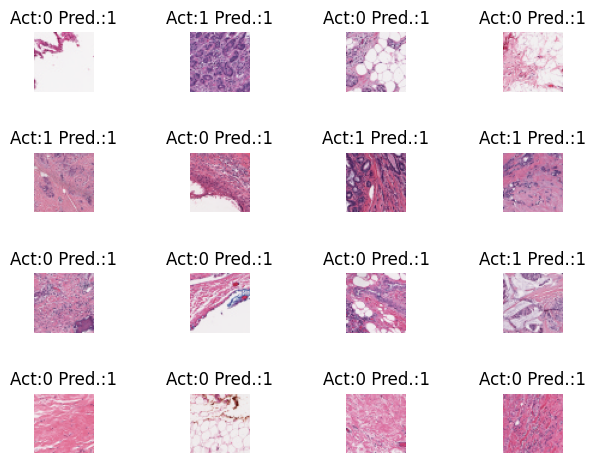

In [3]:
#X,y_raw = X.to('mps'), y_raw.to('mps')
m = torch.nn.Softmax(dim=1)
pred_y = m(model(X)).argmax(1)
#X, y_raw = X.cpu(), y_raw.cpu()

fig, ax = plt.subplots(4,4)
plt.title("Images with their corresponding labels")
plt.tight_layout()
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,4*i+j+1)
        plt.imshow(X[4*i+j].permute(1, 2, 0))
        plt.title(f"Act:{y_raw[4*i+j].argmax().item()} Pred.:{pred_y[4*i+j]}")
        ax[i,j].axis('off')
plt.show()